In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load datasets
comments = pd.read_csv("data/comments.csv")
follows = pd.read_csv("data/follows.csv")
likes = pd.read_csv("data/likes.csv")
photo_tags = pd.read_csv("data/photo_tags.csv")
photos = pd.read_csv("data/photos.csv")
tags = pd.read_csv("data/tags.csv")
users = pd.read_csv("data/users.csv")

In [4]:
# 1. Top 10 users by followers
followers_count = follows.groupby("followee ").size().reset_index(name="followers")
followers_count = followers_count.merge(users, left_on="followee ", right_on="id")
top_followed_users = followers_count.sort_values("followers", ascending=False).head(10)

In [5]:
# 2. Top 10 users by likes received
likes_received = likes.merge(photos, left_on="photo", right_on="id")
likes_per_user = likes_received.groupby("user ID").size().reset_index(name="likes_received")
likes_per_user = likes_per_user.merge(users, left_on="user ID", right_on="id")
top_liked_users = likes_per_user.sort_values("likes_received", ascending=False).head(10)

In [6]:
# 3. Top 10 users by comments received
comments_received = comments.merge(photos, left_on="Photo id", right_on="id")
comments_per_user = comments_received.groupby("user ID").size().reset_index(name="comments_received")
comments_per_user = comments_per_user.merge(users, left_on="user ID", right_on="id")
top_commented_users = comments_per_user.sort_values("comments_received", ascending=False).head(10)

In [7]:
# 4. Most liked photos
most_liked_photos = likes.groupby("photo").size().reset_index(name="likes")
most_liked_photos = most_liked_photos.merge(photos, left_on="photo", right_on="id")
most_liked_photos = most_liked_photos.sort_values("likes", ascending=False).head(10)

In [8]:
# 5. Most commented photos
most_commented_photos = comments.groupby("Photo id").size().reset_index(name="comments")
most_commented_photos = most_commented_photos.merge(photos, left_on="Photo id", right_on="id")
most_commented_photos = most_commented_photos.sort_values("comments", ascending=False).head(10)

In [9]:
# 6. Top hashtags
photo_tagged = photo_tags.merge(tags, left_on="tag ID", right_on="id")
top_tags = photo_tagged.groupby("tag text").size().reset_index(name="count")
top_tags = top_tags.sort_values("count", ascending=False).head(10)

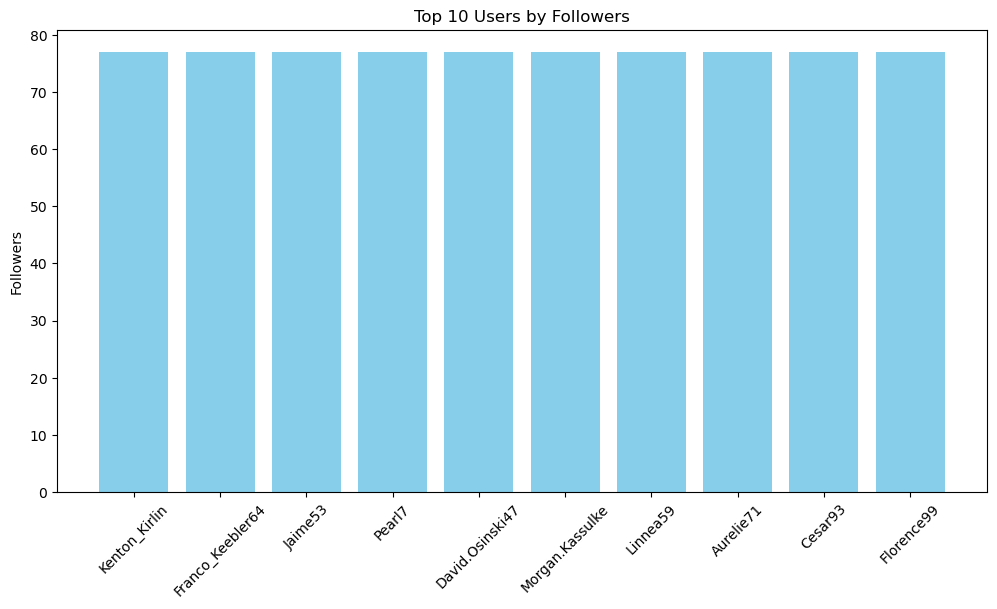

In [10]:
# --- Visualization ---
plt.figure(figsize=(12,6))
plt.bar(top_followed_users["name"], top_followed_users["followers"], color="skyblue")
plt.title("Top 10 Users by Followers")
plt.xticks(rotation=45)
plt.ylabel("Followers")
plt.show()

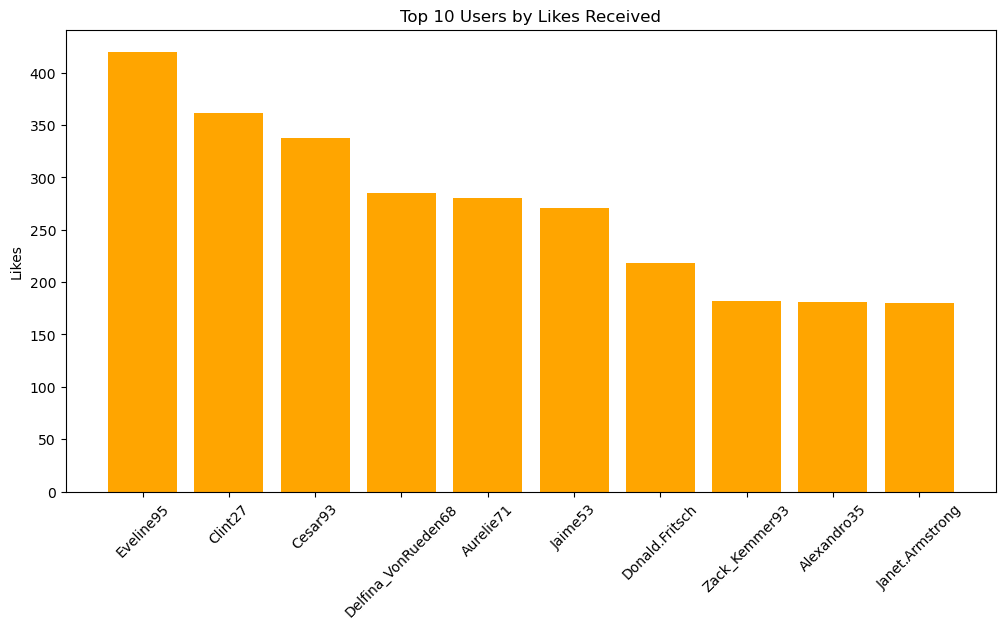

In [11]:
plt.figure(figsize=(12,6))
plt.bar(top_liked_users["name"], top_liked_users["likes_received"], color="orange")
plt.title("Top 10 Users by Likes Received")
plt.xticks(rotation=45)
plt.ylabel("Likes")
plt.show()

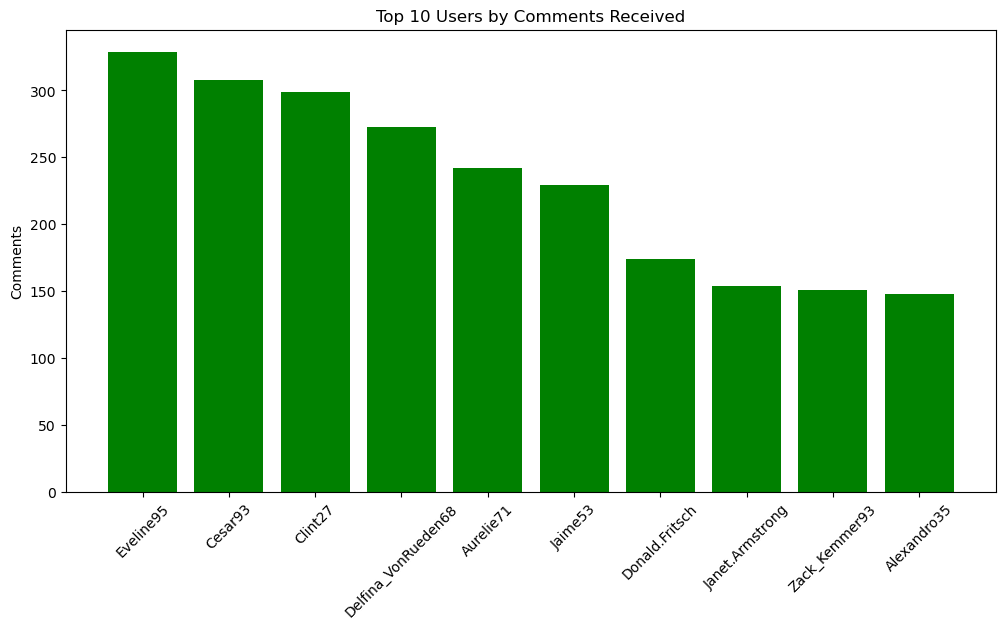

In [12]:

plt.figure(figsize=(12,6))
plt.bar(top_commented_users["name"], top_commented_users["comments_received"], color="green")
plt.title("Top 10 Users by Comments Received")
plt.xticks(rotation=45)
plt.ylabel("Comments")
plt.show()

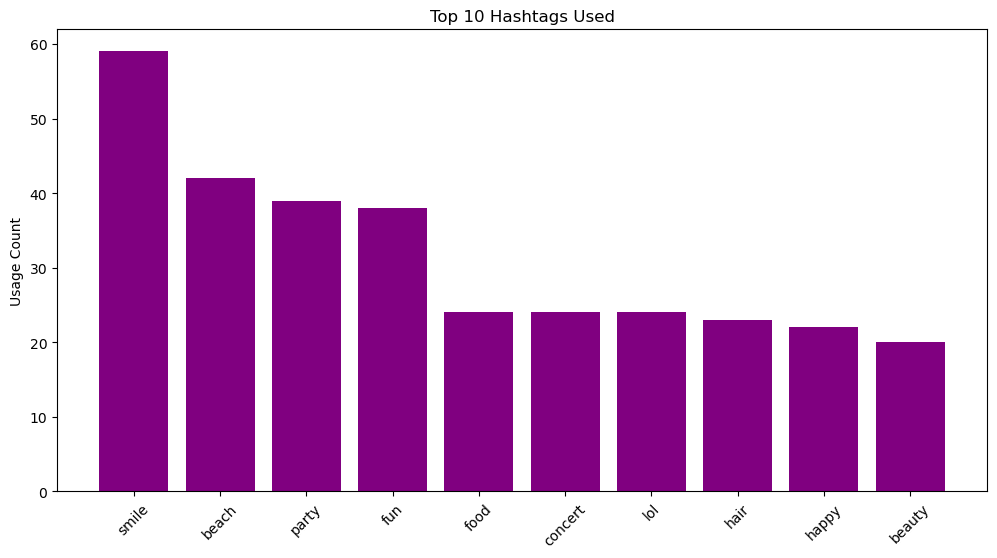

In [13]:
plt.figure(figsize=(12,6))
plt.bar(top_tags["tag text"], top_tags["count"], color="purple")
plt.title("Top 10 Hashtags Used")
plt.xticks(rotation=45)
plt.ylabel("Usage Count")
plt.show()